In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
	def __init__(self):
		super(Net, self).__init__() # call the constructor of the daddy class
		self.conv1 = nn.Conv2d(1, 6, 3) # input channel, output channel, stride
		self.conv2 = nn.Conv2d(6, 16, 3)
		self.fc1 = nn.Linear(16*6*6, 120) #fully connected linear layers
		self.fc2 = nn.Linear(120, 84)
		self.fc2 = nn.Linear(84, 10)

In [14]:
import torch

x = torch.tensor([[1,2,3], [4,5,6]])
print(x)
x.storage()[5]

tensor([[1, 2, 3],
        [4, 5, 6]])


6

tensor([78.])
tensor([26.])
None
None


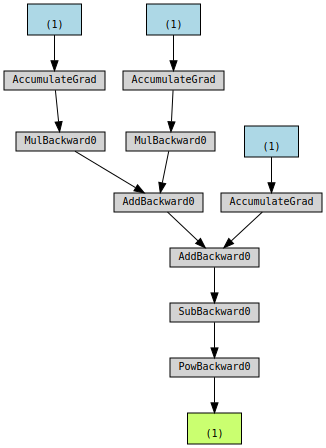

In [24]:
import torch
from torchviz import make_dot

x = torch.tensor([3])
y = torch.tensor([10])
a = torch.tensor([1.], requires_grad=True)
b = torch.tensor([2.], requires_grad=True)

y_hat = a*x + b
z = y_hat - y
L = z**2

L.backward()

print(a.grad) # -30
print(b.grad) # -10

print(x.grad_fn) # None
print(a.grad_fn) # None
print(y_hat.grad_fn) # AddBackward0 
print(z.grad_fn) # SubBackward0 
print(L.grad_fn) # PowBackward0

make_dot(L)

tensor([25.], grad_fn=<MySquareBackward>)
tensor([-30.]) tensor([-10.])


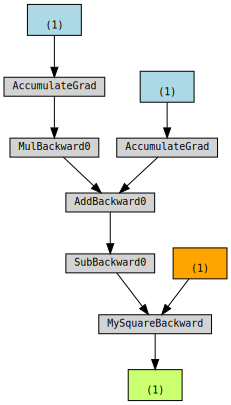

In [36]:
class MySquare(torch.autograd.Function):

  @staticmethod
  def forward(ctx, input):
    ctx.save_for_backward(input)
    return input**2

  @staticmethod
  def backward(ctx, grad_output):
    input, = ctx.saved_tensors
    return 2*input*grad_output

my_square = MySquare.apply

x = torch.tensor([3])
y = torch.tensor([10])
a = torch.tensor([1.], requires_grad=True)
b = torch.tensor([2.], requires_grad=True)

y_hat = a*x + b
z = y_hat - y
L = my_square(z)

# torch.autograd.gradcheck(my_square, L)
# torch.autograd.gradgradcheck(MySquare.apply, L)

L.backward(retain_graph=True)
print(a.grad, b.grad)

make_dot(L)

In [49]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = 2*x + 1
z = sum(y)
print(z)
z.backward()


tensor(15., grad_fn=<AddBackward0>)
